# THE SPARKS FOUNDATION
## Task 1 by: Samiksha Mulik

Task 1: Prediction using Supervised ML

Objective: Predict the percentage of an student based on the no. of study hours.
Data source: http://bit.ly/w-data

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data from given link

url = "http://bit.ly/w-data"
st_data= pd.read_csv(url)
st_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
st_data.shape

(25, 2)

In [4]:
st_data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

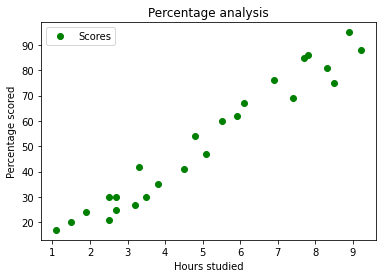

In [5]:
#Data visualisation using scatter plot

st_data.plot(x='Hours', y='Scores', style='o',c='green')
plt.title('Percentage analysis')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

In [6]:
#dividing data into attributes and labels

X = st_data.iloc[:, :-1].values  
y = st_data.iloc[:, 1].values

In [7]:
#split this data into training and test sets

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#training the algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Score:", regressor.score(X_train, y_train))
print("Training complete.")

Score: 0.9515510725211552
Training complete.


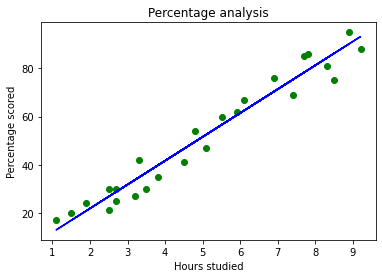

In [9]:
# Plotting the regression line

m=regressor.coef_
c=regressor.intercept_
line=m*X+c

# Plotting for the test data

plt.scatter(X, y,c='green')
plt.plot(X, line, c='blue');
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.title('Percentage analysis')
plt.show()

In [10]:
#making predictions

print(X_test) #Testing data - In Hours
y_pred = regressor.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
#What will be predicted score if a student studies for 9.25 hrs/ day?

hours = [9.25]
result = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(result[0],2)))

No of Hours = [9.25]
Predicted Score = 93.69


In [13]:
#Evaluating the model

from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean squared Error:',metrics.mean_squared_error(y_test, y_pred)) 
print('Accuracy:',regressor.score(X_test, y_test)*100,'%')

Mean Absolute Error: 4.183859899002982
Mean squared Error: 21.598769307217456
Accuracy: 94.54906892105353 %
